In [24]:
# Skylar Haskiell
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
from textwrap import wrap

from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# pull in data
df = pd.read_pickle("../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df.reset_index(inplace = True, drop = True)

In [3]:
# df.head()

In [4]:
df.shape

(1143869, 30)

In [5]:
docs = df["final_tokens"]  

In [6]:
#counts number of abstracts that contain 'data'
term_match_data = []
for i, abstract in enumerate(docs):
        if ('data' in abstract):
            term_match_data.append(i)

In [7]:
len(term_match_data)

138685

In [8]:
term_match_idx = []

for i, abstract in enumerate(docs):
    if ('data' in abstract): 
        if ('big' in abstract or 'mining' in abstract):
            term_match_idx.append(i)

In [9]:
len(term_match_idx) 

9327

In [10]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(docs)

terms = vectorizer.get_feature_names()

In [11]:
dtm.shape

(1143869, 1629626)

In [12]:
#checks for all terms relating to data 
count = 0

for term in terms:
    if 'data' in term:
        if not 'base' in term: 
#             print(term)
            count = count + 1
        
print(count)

2955


In [13]:
term_counts = dtm.sum(axis=0)

In [14]:
icount = 0
for term in terms:
    if 'data' in term:
        if 'mining' in term or 'big' in term:
            if not 'http'in term:
                print(term)
                icount = icount + 1
        
print(icount)

big_dataresearch
bigdata
bigdata_4
bigdataadministrative
bigdatasimpact
bigdatatop100org
bigdatax
biggerdata
bigreddata
biodata_mining
bydatamining
databasemining
dataexamining
datamining
dataminingtool
miningdata
16


In [15]:
#will create set of all terms with data and big or mining and list their frequency
di = {}

for i, term in enumerate(terms):
    if 'data' in term:
        if 'mining' in term or 'big' in term:
            if not 'http' in term:
        #print(term)
                di[term] = term_counts[0,i]

In [16]:
di

{'big_dataresearch': 7,
 'bigdata': 208,
 'bigdata_4': 2,
 'bigdataadministrative': 1,
 'bigdatasimpact': 1,
 'bigdatatop100org': 1,
 'bigdatax': 10,
 'biggerdata': 5,
 'bigreddata': 2,
 'biodata_mining': 14,
 'bydatamining': 3,
 'databasemining': 2,
 'dataexamining': 3,
 'datamining': 21,
 'dataminingtool': 2,
 'miningdata': 1}

In [17]:
docs_ix = np.concatenate([term_match_idx]) 

In [18]:
docs_idx = np.unique(docs_ix)

In [19]:
filt_corpus = df.loc[docs_idx, :]

In [20]:
filt_corpus = filt_corpus[~filt_corpus.PROJECT_TERMS.isnull()]

In [27]:
filt_corpus.head()

,PROJECT_ID,ABSTRACT,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,CONGRESSIONAL_DISTRICT,DUNS_NUMBER,ORGANIZATION_NAME,ORGANIZATION_CITY,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ORG_COUNT,PI_COUNT,FY_TOTAL_COST_SUM,NUM_RECORDS,final_tokens
245,89815,This proposal seeks to advance our understandi...,Address; Adsorption; Archives; Attention; Bioa...,COLLABORATIVE RESEARCH: EVOLUTION OF DISSOLVED...,NSF,NSF,NaN,0809254,10/1/2008,9/30/2011,"LENTERS, JOHN D","SCOTT, DURELLE",01,555456995,UNIVERSITY OF NEBRASKA LINCOLN,LINCOLN,NE,68588-0430,UNITED STATES,NaN,NaN,47.050,2008,138458.0,NaN,2,2,470378.0,2,proposal seek advance understanding transport ...
254,89807,This proposal seeks to advance our understandi...,Address; Adsorption; Archives; Attention; Bioa...,COLLABORATIVE RESEARCH: EVOLUTION OF DISSOLVED...,NSF,NSF,NaN,0809231,10/1/2008,9/30/2012,"MITCHELL, MYRON J",NaN,21,804878247,STATE UNIVERSITY NEW YORK STONY BROOK,ALBANY,NY,12201-0009,UNITED STATES,NaN,NaN,47.050,2008,70256.0,NaN,1,1,70256.0,1,proposal seek advance understanding transport ...
283,89781,The goal of the Firefly cubesat is to unambigu...,Acceleration; Altitude; Characteristics; Colla...,COLLABORATIVE RESEARCH: CUBESAT FIREFLY--UNDER...,NSF,NSF,NaN,0838015,10/1/2008,9/30/2011,"WEATHERWAX, ALLAN T",NaN,21,080481351,SIENA COLLEGE,LOUDONVILLE,NY,12211-1462,UNITED STATES,NaN,NaN,47.050,2008,329432.0,NaN,1,1,329432.0,1,goal firefly cubesat unambiguously determine t...
300,89765,This project develops novel computational appr...,Address; Algorithms; analytical tool; base; Be...,DHB: LONGITUDINAL ANALYSIS AND MODELING OF LAR...,NSF,NSF,NaN,0826958,10/1/2008,9/30/2012,"TOROCZKAI, ZOLTAN","ALBER, MARK; CHAWLA, NITESH; LIZARDO, OMAR; HA...",02,824910376,UNIVERSITY OF NOTRE DAME,NOTRE DAME,IN,46556-5612,UNITED STATES,NaN,NaN,47.075,2008,711770.0,NaN,1,1,711770.0,1,project develop novel computational approach a...
386,90167,0743933GhiorsoThis award provides funding to i...,Archives; Automatic Data Processing; Award; Co...,GEOINFORMATICS: COLLABORATIVE RESEARCH: PROPOS...,NSF,NSF,NaN,0743933,9/15/2008,8/31/2010,"GHIORSO, MARK S",NaN,08,602157450,OFM RESEARCH,REDMOND,WA,98053-8841,UNITED STATES,NaN,NaN,47.050,2008,159836.0,NaN,1,1,159836.0,1,award provide funding improve library experime...


In [21]:
wrd_frq = pd.Series(' '.join(filt_corpus.PROJECT_TERMS).split())
wrd_frq = wrd_frq.str.lower()
wrd_frq = wrd_frq.str.rstrip(";")
wrd_frq = wrd_frq.str.rstrip("s")
wrd_frq = wrd_frq.value_counts()

In [22]:
wrd_frq[0:40]

data           30710
research       23227
health          9510
system          8363
clinical        7928
development     7435
disease         6877
of              6638
science         5910
tool            5621
computer        5603
base            5556
method          5368
resource        5228
gene            5132
design          4785
human           4693
modeling        4655
biological      4549
genetic         4532
personnel       4431
proce           4400
program         4372
cell            4301
training        4239
cancer          4199
technology      4188
goal            4185
novel           4154
database        4144
study           4048
software        3893
patient         3782
learning        3748
mining          3729
protein         3671
work            3668
improved        3595
and             3571
risk            3551
dtype: int64

In [28]:
filt_corpus["FY"] = filt_corpus["FY"].astype('int')

In [30]:
year_counts = filt_corpus['FY'].value_counts().sort_index(ascending=True)
print(year_counts)

2008     382
2009     487
2010     433
2011     386
2012     433
2013     571
2014     673
2015     764
2016     884
2017     937
2018    1051
2019     673
2020     721
Name: FY, dtype: int64


In [32]:
cb_pal = {"blue":'#377eb8', "orange":'#ff7f00', "green":'#4daf4a', "pink":'#f781bf', "brown":'#a65628', 
          "purple":'#984ea3', "gray":'#999999', "red":'#e41a1c', "yellow":'#dede00'}

<ipython-input-35-d54647f0cc45>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


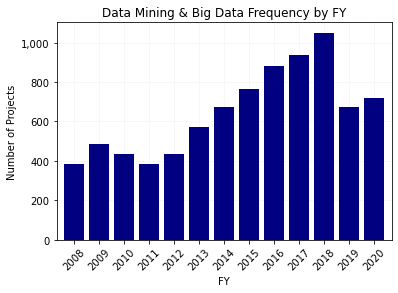

In [35]:
year = year_counts.index.tolist()
count = year_counts.values

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt.xlim(2007.3,2020.7)
plt.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt.xlabel("FY")
plt.ylabel("Number of Projects")
plt.title("Data Mining & Big Data Frequency by FY")

plt.savefig("startyr_freq.png", dpi = 800, bbox_inches = "tight")
plt.savefig("startyr_freq.pdf", dpi = 800, bbox_inches = "tight")